In [1]:
from PIL import Image
import random
import numpy as np

In [2]:
group_num = 25
variant_count = 10
variant_num = (group_num - 1) % variant_count + 1
variant_num

5

## Задачи лабораторной работы №2

Демонстрируется результат каждой операции (до и после).
Задания:
1. Приведение полноцветного изображения к полутоновому. Новое изображение
создаётся в режиме полутона (1 яркостный канал, формат bmp), где яркость каждого пикселя вычисляется (взвешенным) усреднением каналов исходного полноцветного изображения.
2. Приведение полутонового изображения к монохромному методом пороговой обработки. Демонстрируется на нескольких изображениях, например: контурная карта, рентгеновский снимок, скриншот из мультфильма, фотография, отпечаток пальца, неравномерно засвеченная страница текста.  
    Вариант: 5. Алгоритм адаптивной бинаризации Кристиана.


In [3]:
def pixel_mean_value_grayscale(pixel):
    return int(round((pixel[0] + pixel[1] + pixel[2]) / 3))

In [4]:
def pixel_photoshop_grayscale(pixel):
    return int(round(pixel[0] * 0.3 + pixel[1] * 0.59 + pixel[2] * 0.11))

In [5]:
def mean_grayscale(image):
    result = Image.new('L', (image.width, image.height))

    for x in range(result.width):
        for y in range(result.height):
            pixel = image.getpixel((x, y))
            new_pixel = int(round((pixel[0] + pixel[1] + pixel[2]) / 3))
            result.putpixel((x, y), new_pixel)

    return result

In [6]:
def photoshop_grayscale(image):
    result = Image.new('L', (image.width, image.height))

    for x in range(result.width):
        for y in range(result.height):
            pixel = image.getpixel((x, y))
            new_pixel = int(round(pixel[0] * 0.3 + pixel[1] * 0.59 + pixel[2] * 0.11))
            result.putpixel((x, y), new_pixel)

    return result

In [7]:
rentgen = Image.open('rentgen.png')
rentgen_mean_grayscale = mean_grayscale(rentgen)
rentgen_photoshop_grayscale = photoshop_grayscale(rentgen)
rentgen_mean_grayscale.save('rentgen_mean_grayscale.png')
rentgen_photoshop_grayscale.save('rentgen_photoshop_grayscale.png')

In [8]:
butterflies = Image.open('butterflies.png')
butterflies_mean_grayscale = mean_grayscale(butterflies)
butterflies_photoshop_grayscale = photoshop_grayscale(butterflies)
butterflies_mean_grayscale.save('butterflies_mean_grayscale.png')
butterflies_photoshop_grayscale.save('butterflies_photoshop_grayscale.png')

In [9]:
landscape = Image.open('landscape.png')
landscape_mean_grayscale = mean_grayscale(landscape)
landscape_photoshop_grayscale = photoshop_grayscale(landscape)
landscape_mean_grayscale.save('landscape_mean_grayscale.png')
landscape_photoshop_grayscale.save('landscape_photoshop_grayscale.png')

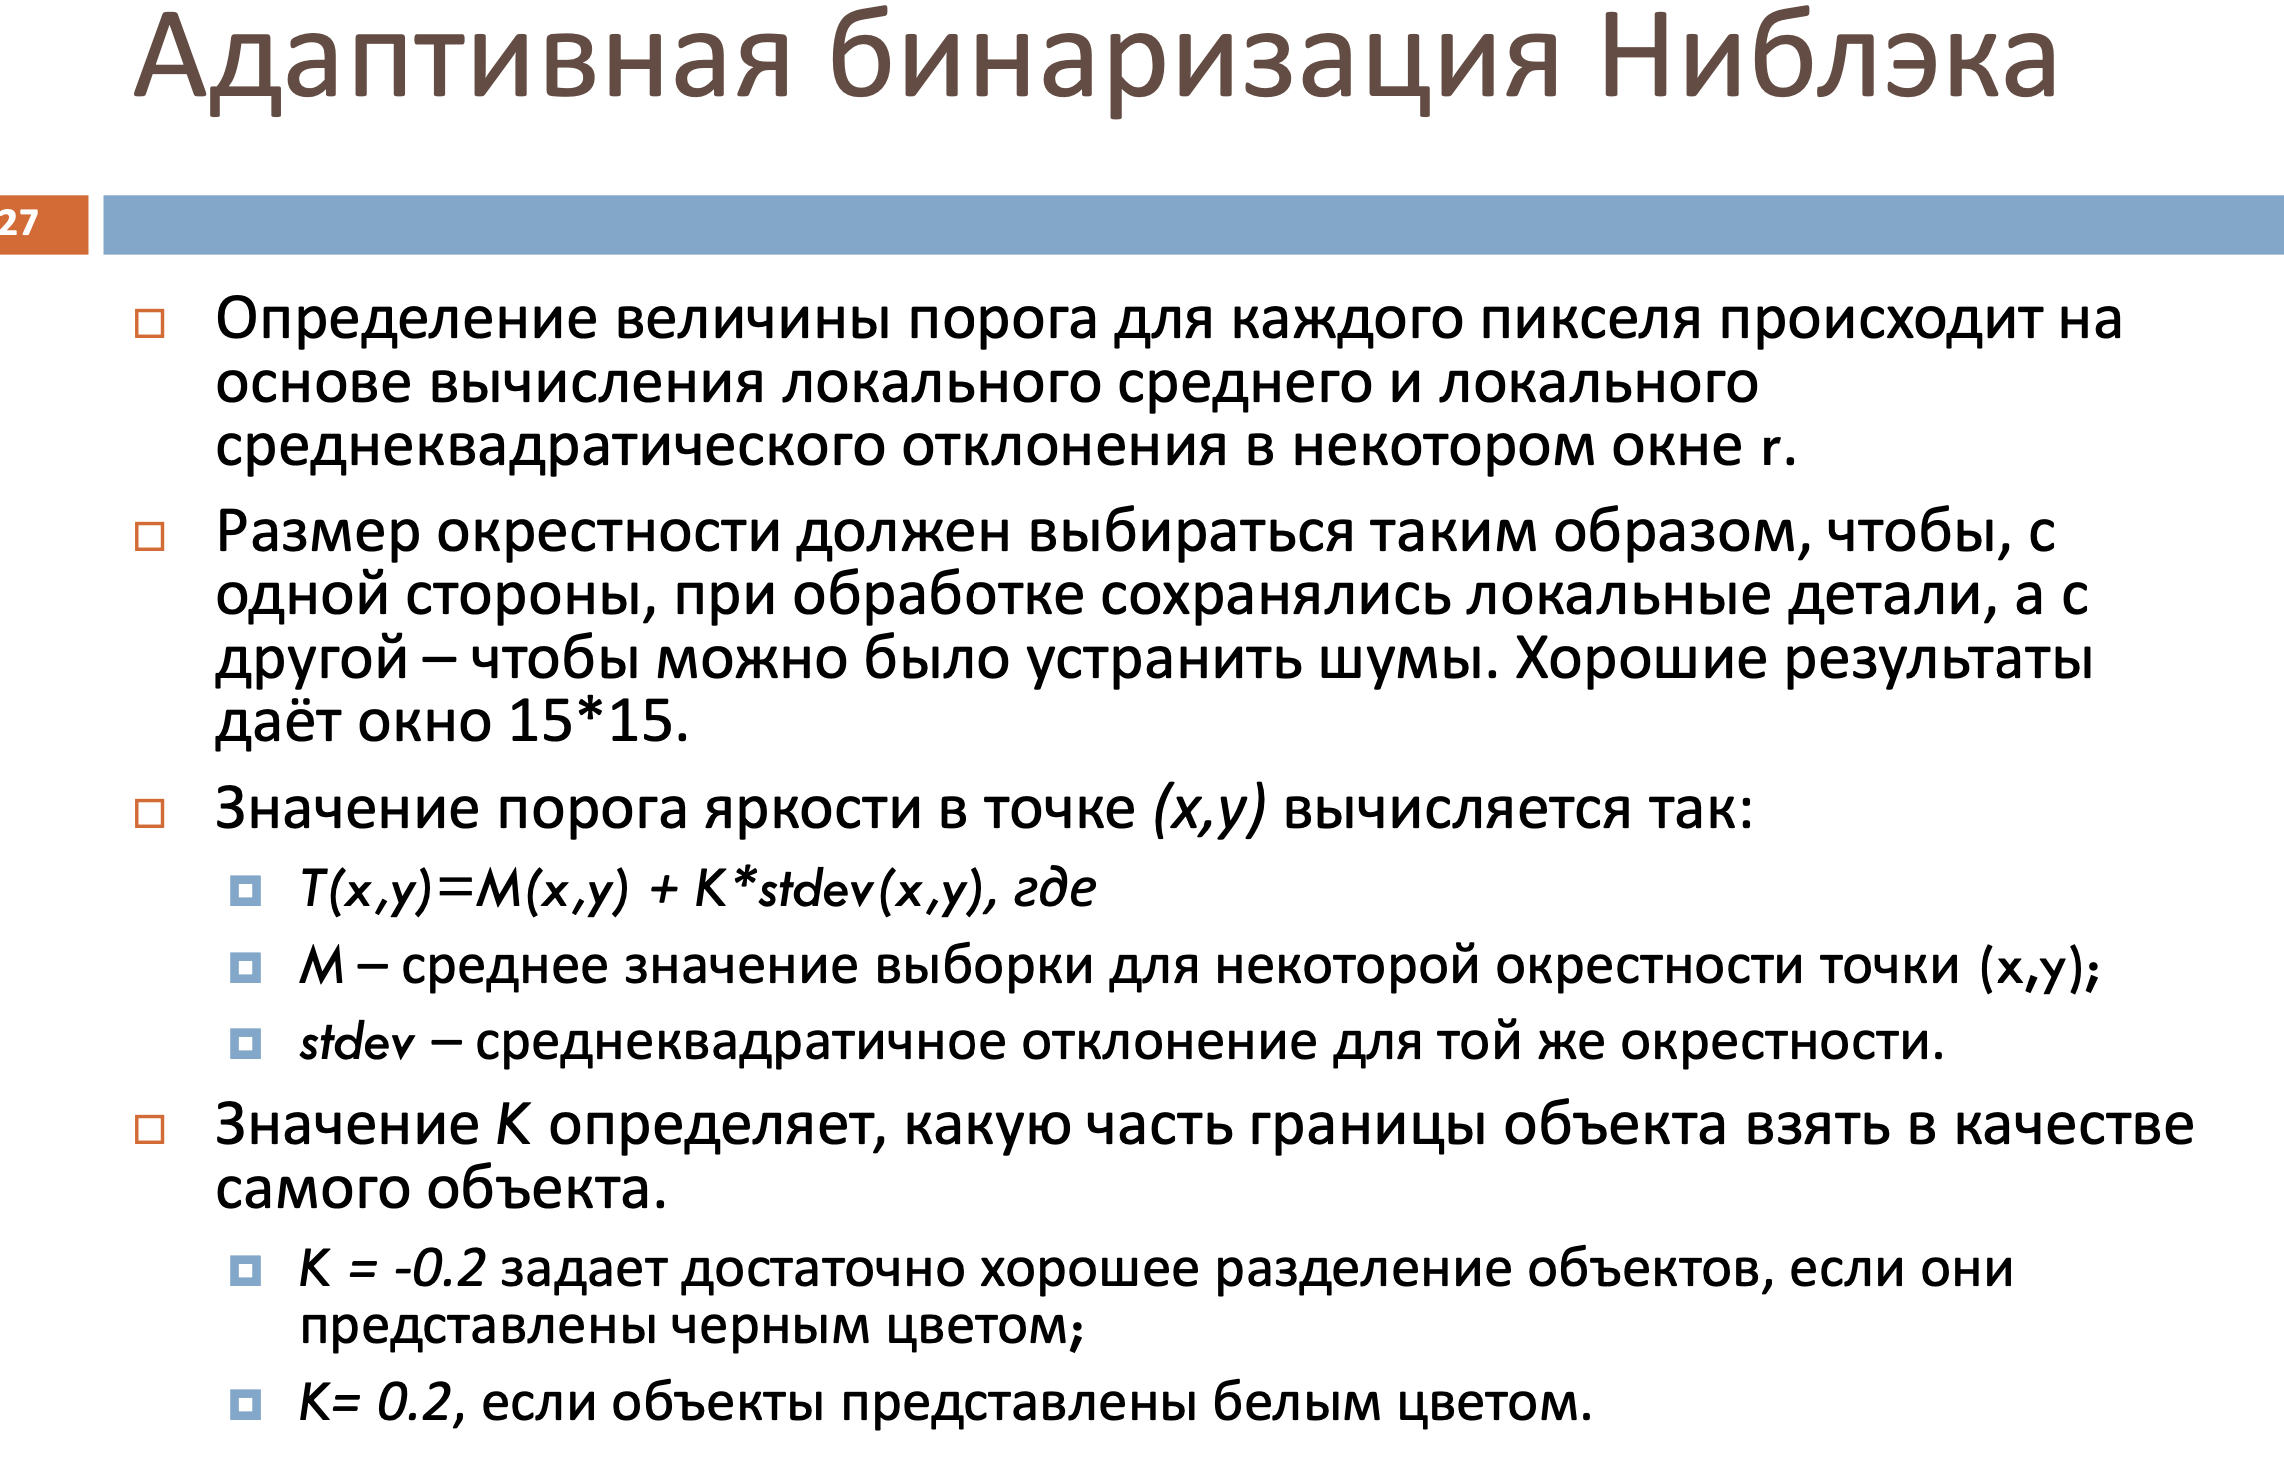

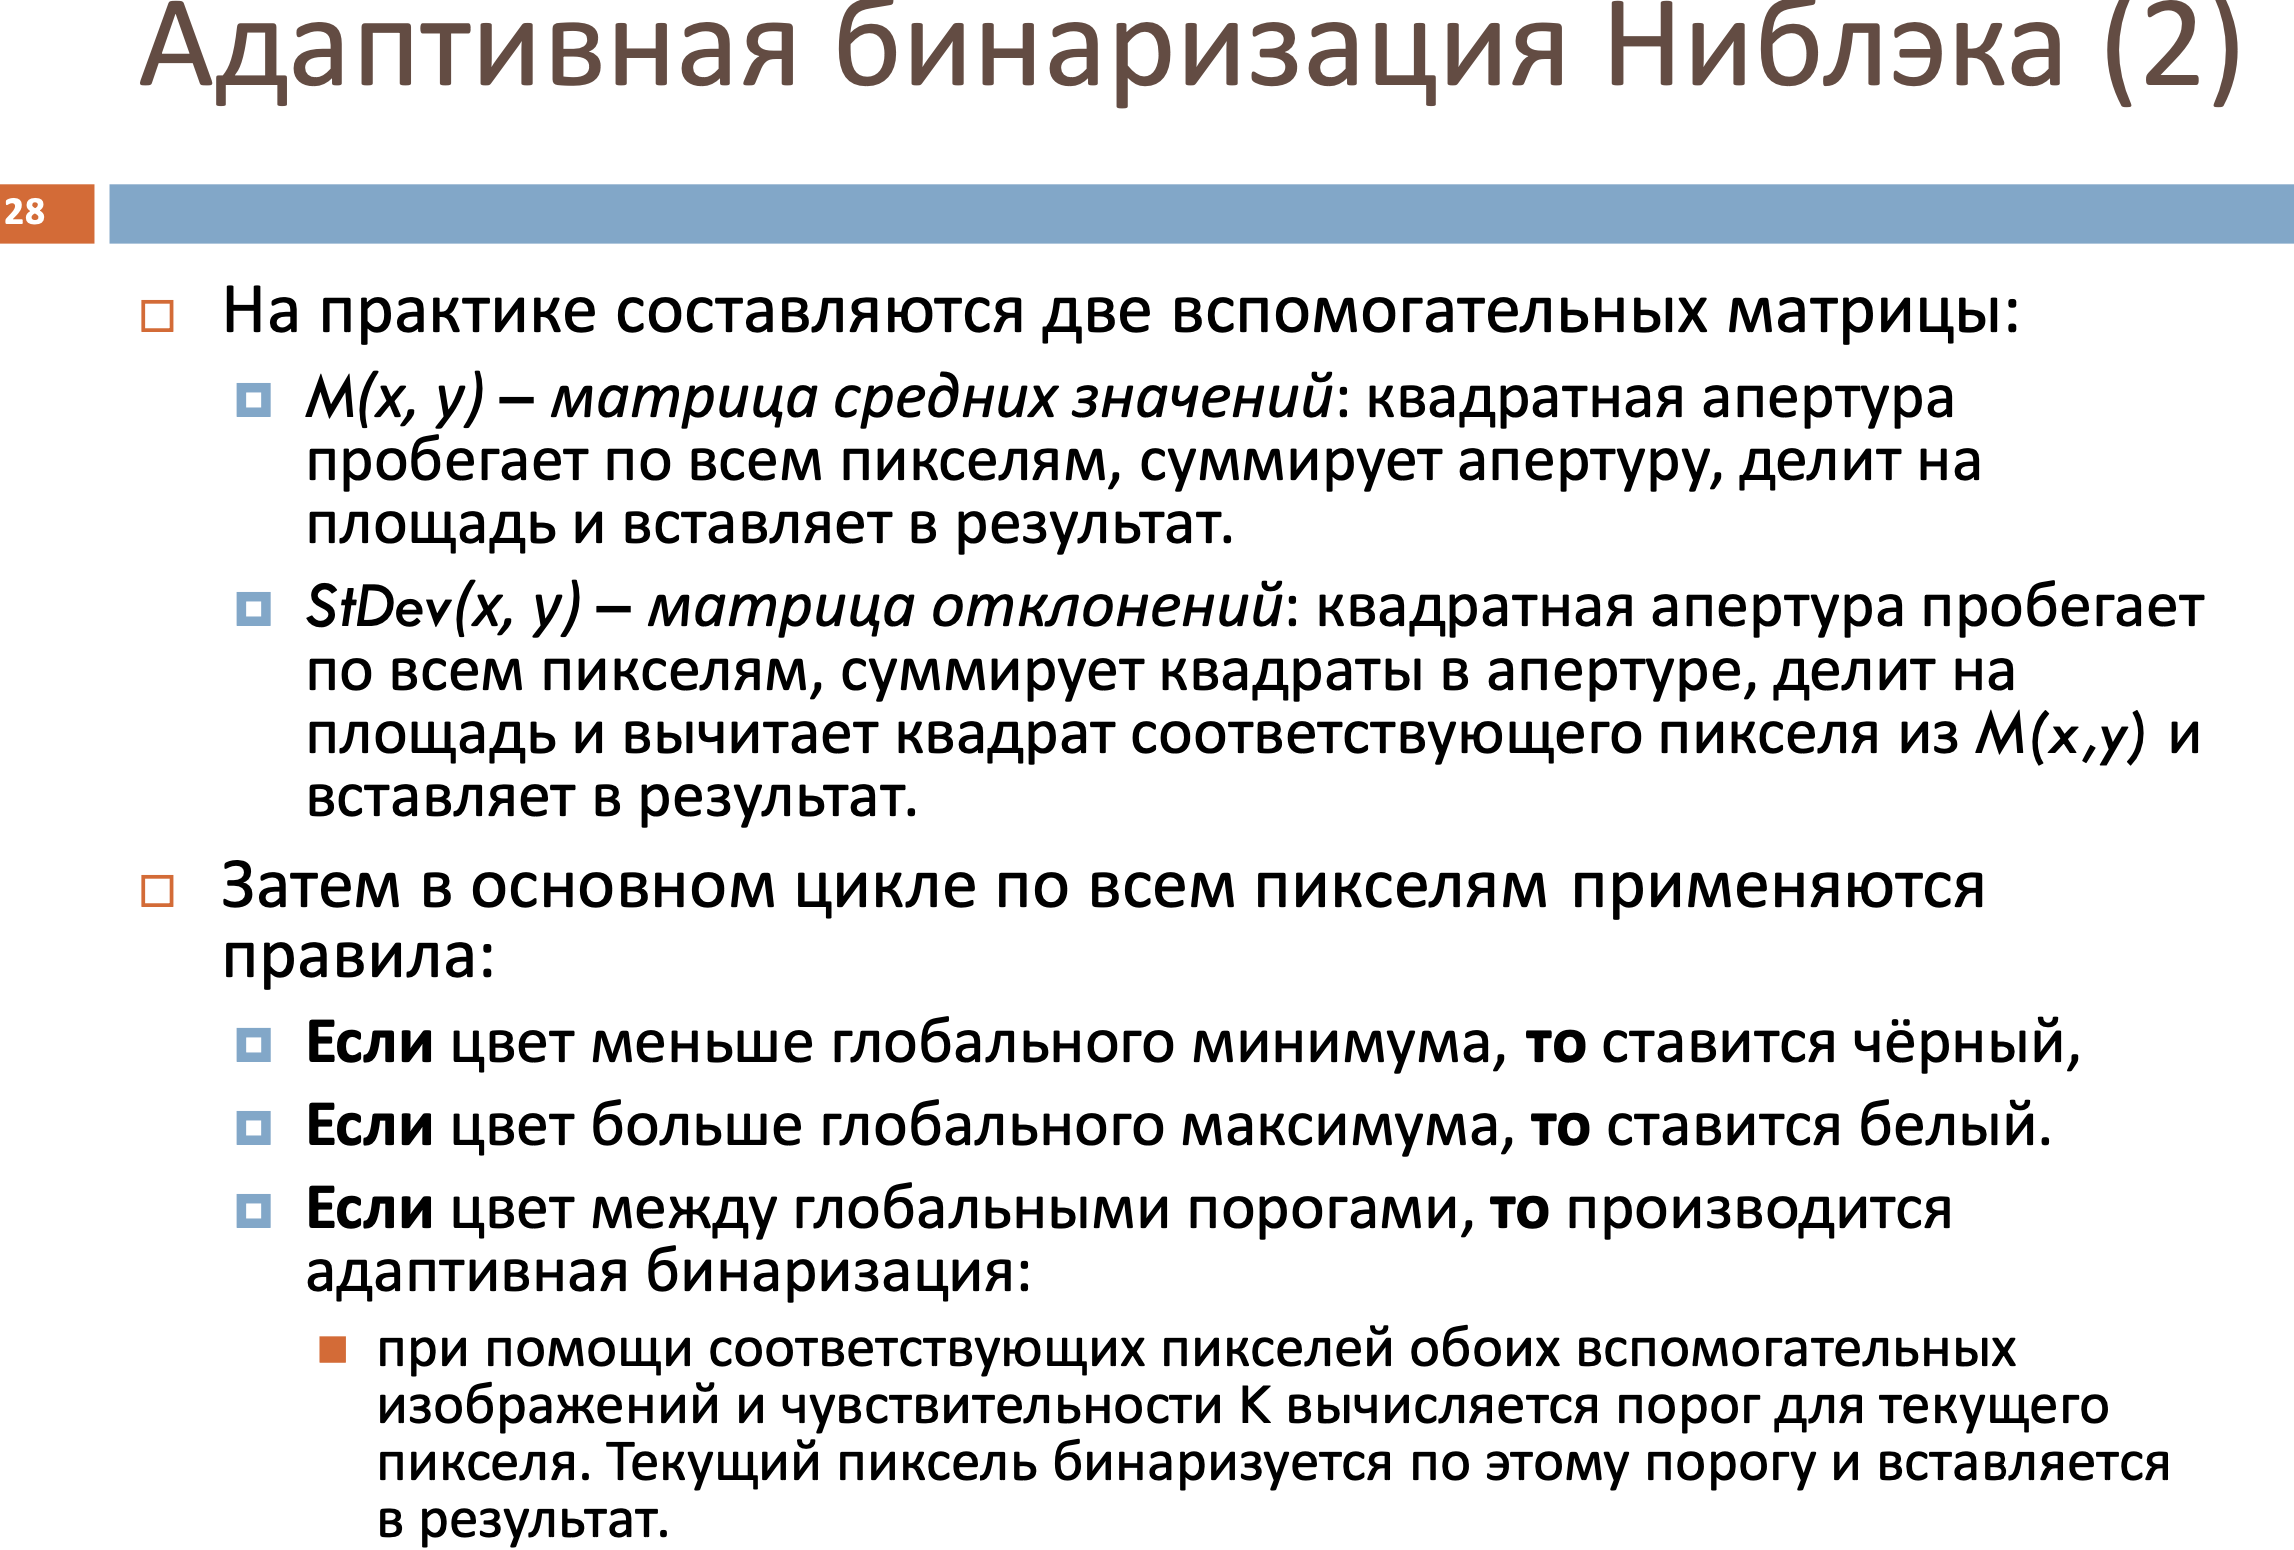

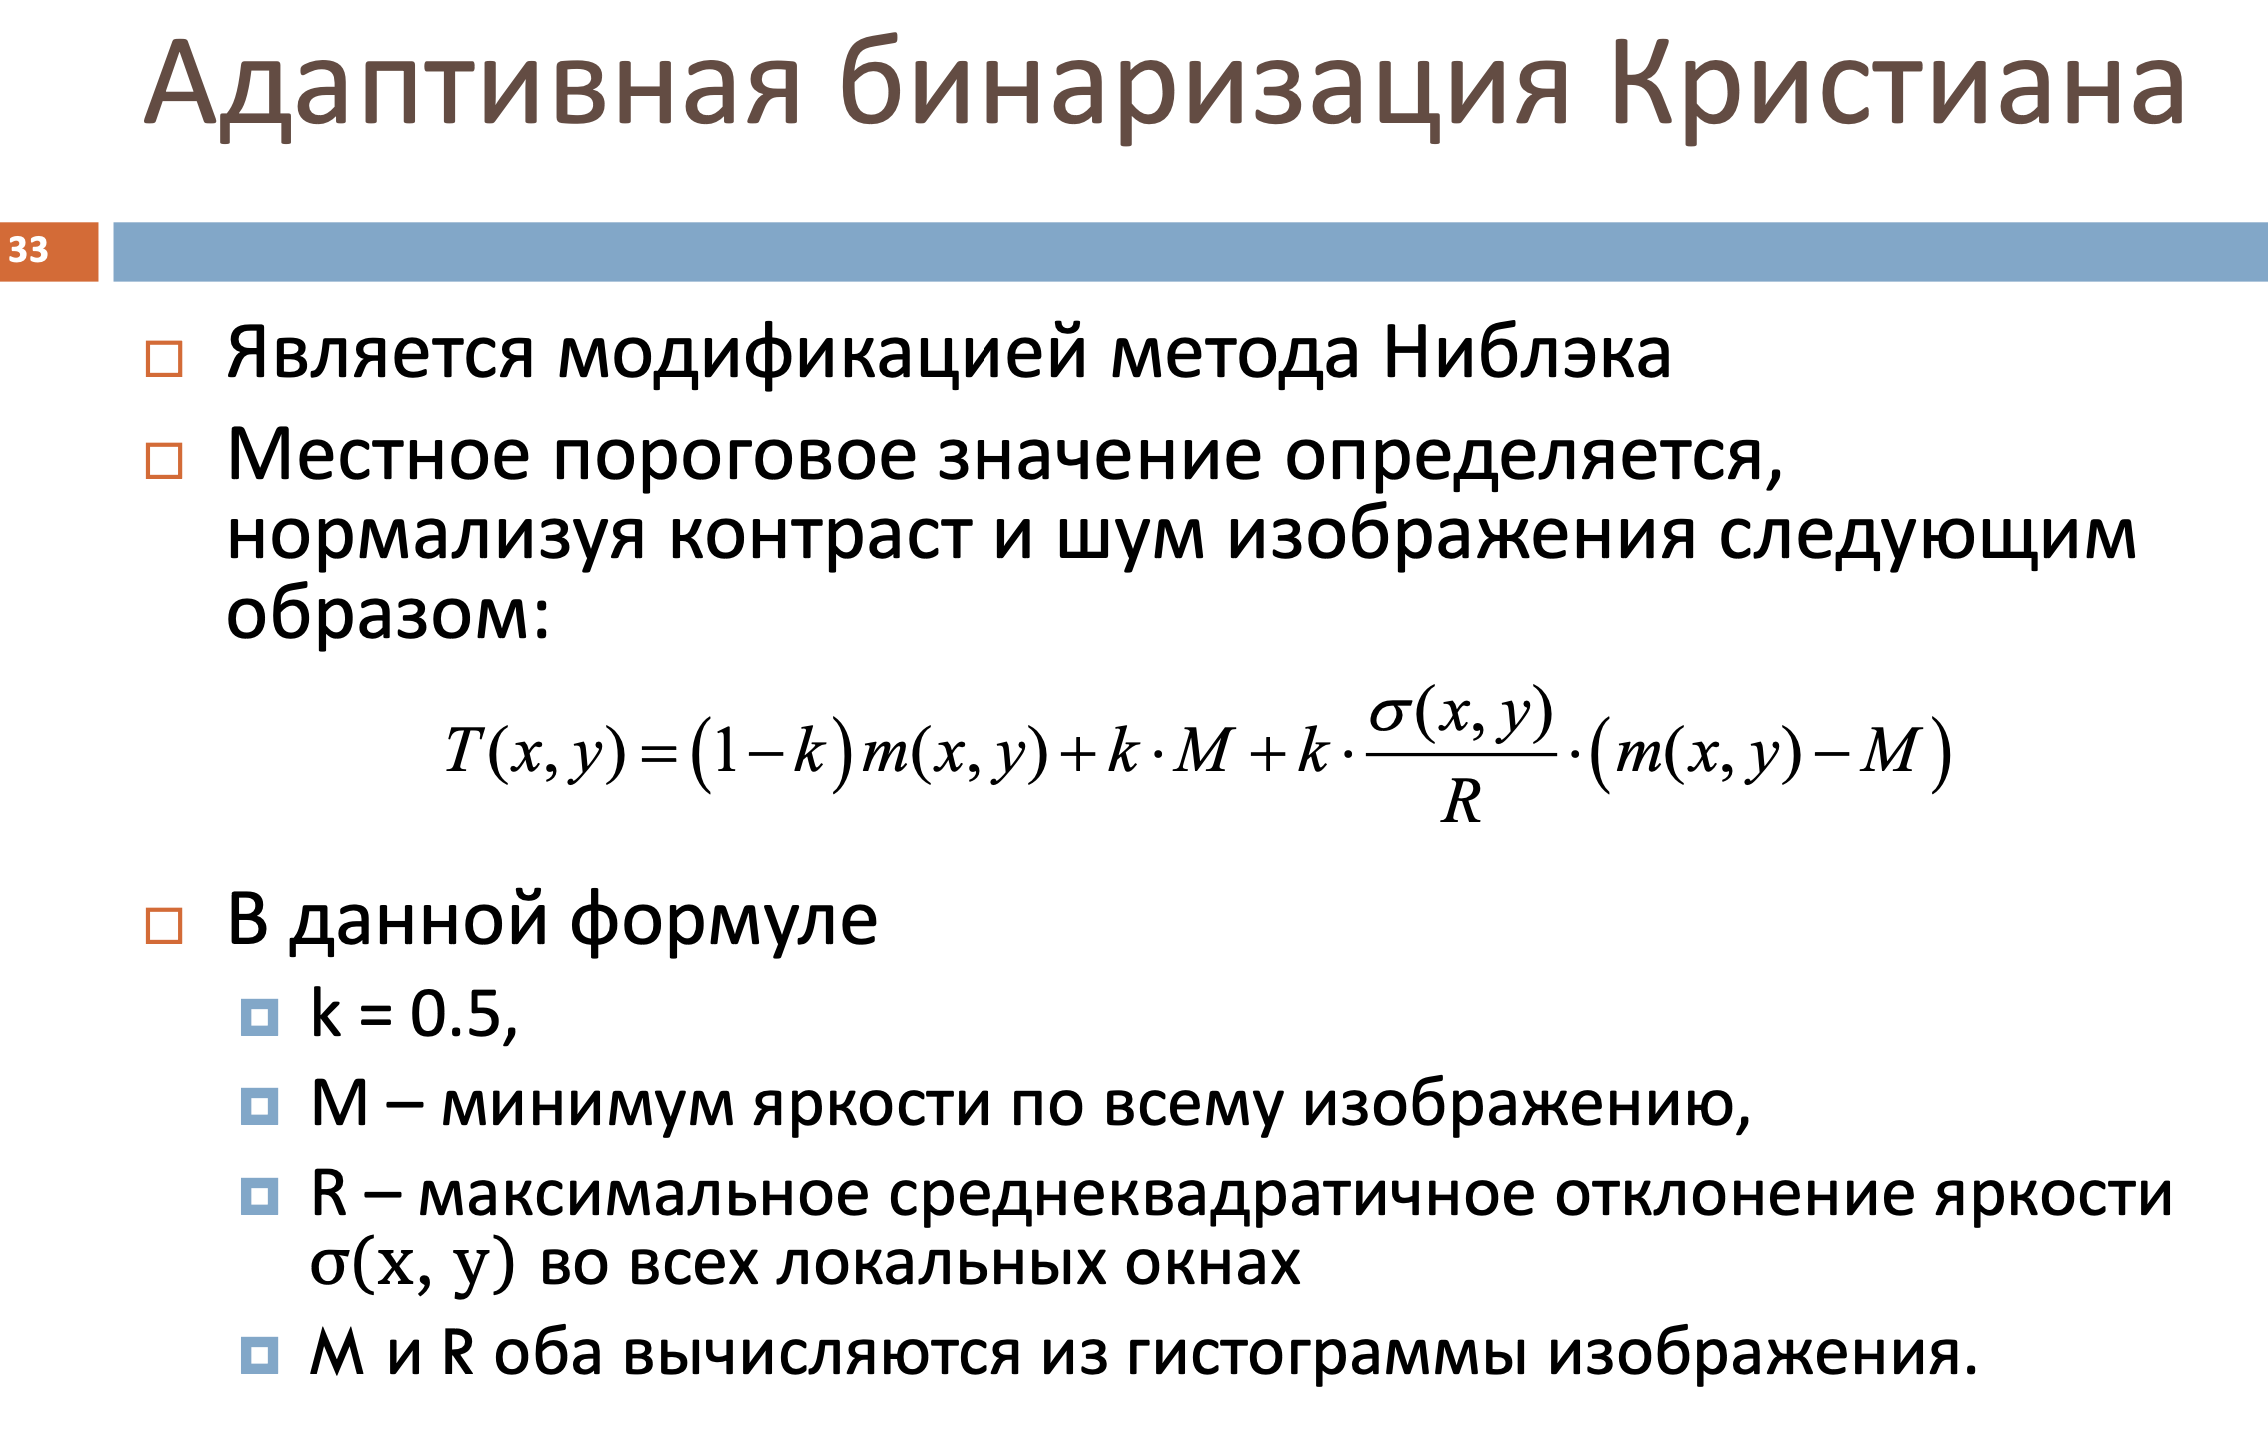

In [10]:
def christian_binarize(image, window_size=15, k=0.5):
    gray_img = photoshop_grayscale(image)
    width, height = gray_img.size
    
    # Convert the grayscale image to a NumPy array
    gray_arr = np.asarray(gray_img, dtype=np.uint8)
    
    # Compute the global mean and standard deviation of the image
    global_mean = np.mean(gray_arr)
    global_std = np.std(gray_arr)

    # Create an array to hold the threshold values for each pixel
    threshold_arr = np.zeros_like(gray_arr)
    # Compute the threshold for each pixel based on the local mean and standard deviation
    for i in range(height):
        for j in range(width):
            i_min = max(i - window_size // 2, 0)
            i_max = min(i + window_size // 2, height - 1)
            j_min = max(j - window_size // 2, 0)
            j_max = min(j + window_size // 2, width - 1)
            
            local_mean = np.mean(gray_arr[i_min:i_max+1, j_min:j_max+1])
            local_std = np.std(gray_arr[i_min:i_max+1, j_min:j_max+1])


            contrast = local_std / global_std
            threshold = (1 - k) * local_mean + k * global_mean + k * (local_mean - global_mean) * contrast
            threshold_arr[i, j] = threshold

    binary_arr = gray_arr > threshold_arr
    binary_img = Image.fromarray(binary_arr.astype(np.uint8) * 255)

    return binary_img

In [11]:
rentgen = Image.open('rentgen.png')
rentgen_bin_15 = christian_binarize(rentgen, 15)
rentgen_bin_15.save('rentgen_bin_15.png')

In [12]:
butterflies = Image.open('butterflies.png')
butterflies_bin_15 = christian_binarize(butterflies, window_size = 15)
butterflies_bin_50 = christian_binarize(butterflies, window_size = 50)
butterflies_bin_15.save('butterflies_bin_15.png')
butterflies_bin_50.save('butterflies_bin_50.png')

In [13]:
landscape = Image.open('landscape.png')
landscape_bin_15 = christian_binarize(landscape)
landscape_bin_15.save('landscape_bin_15.png')

In [14]:
map_img = Image.open('map.png')
map_bin_15 = christian_binarize(map_img, 15)
map_bin_50 = christian_binarize(map_img, 50)
map_bin_15.save('map_bin_15.png')
map_bin_50.save('map_bin_50.png')